In [2]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

wine_data = load_wine()
wine_data_df = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
wine_data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Decision tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decisionTree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
decisionTree = decisionTree.fit(wine_data_df, wine_data.target)
decisionTreeValues = cross_val_score(decisionTree,  wine_data_df,  wine_data.target)

expected_values_decision_tree = [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]
print(f'Cross val score: {decisionTreeValues}')
print(f'Expected values: {expected_values_decision_tree}')

Cross val score: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
Expected values: [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]


### Bagging

In [4]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50)
bagging = bagging.fit(wine_data_df, wine_data.target)
baggingValues = cross_val_score(bagging, wine_data_df, wine_data.target)

expected_values_bagging =  [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.]
print(f'Cross val score: {baggingValues}')
print(f'Expected values: {expected_values_bagging}')

C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-p

Cross val score: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
Expected values: [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.0]


### AdaBoost

In [6]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50, algorithm='SAMME')
adaBoost = adaBoost.fit(wine_data_df, wine_data.target)
adaBoostValues = cross_val_score(adaBoost, wine_data_df, wine_data.target)

expected_values_adaBoost = [0.83333333, 0.91666667, 0.91666667, 1,1]
print(f'Cross val score: {adaBoostValues}')
print(f'Expected values: {expected_values_adaBoost}')

C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\adamz\anaconda3\lib\site-p

Cross val score: [0.83333333 0.91666667 0.91666667 1.         1.        ]
Expected values: [0.83333333, 0.91666667, 0.91666667, 1, 1]


### GradientBoosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
gradientBoosting = gradientBoosting.fit(wine_data_df, wine_data.target)
gradientBoostingValues = cross_val_score(gradientBoosting, wine_data_df, wine_data.target)

expected_values_gradient_boosting = [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]
print(f'Cross val score: {gradientBoostingValues}')
print(f'Expected values: {expected_values_gradient_boosting}')

Cross val score: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]
Expected values: [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]


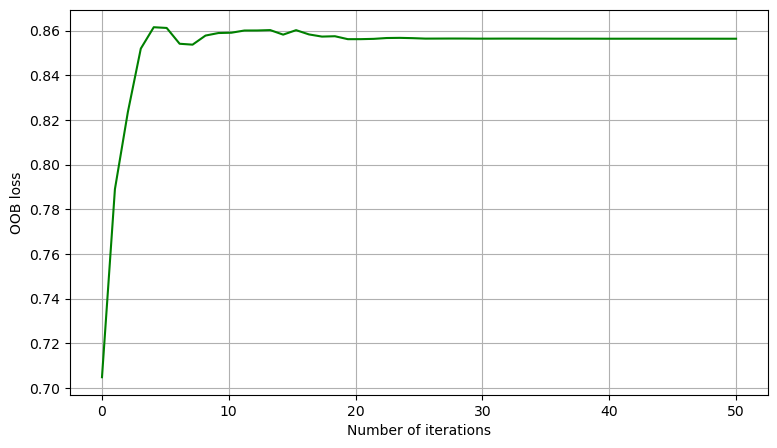

In [10]:
cumsum = np.cumsum(gradientBoosting.oob_improvement_)
plt.figure(figsize=(9,5))
x_val = np.linspace(0,len(cumsum), 50)
plt.plot(x_val, cumsum, color='green')
plt.grid()
plt.xlabel(f'Number of iterations')
plt.ylabel(f'OOB loss')
plt.show()

An approximated number of iterations after which the Gradient Boosting model yields almost no further improvement is 25